About the data

https://www.kaggle.com/jangot/ligue1-match-statistics/data

Match Statistics from top 5 European Leagues
Italy, Spain, England, Germany, France 2012-2017

by Jemilu Mohammed
last updated 3 months ago

   Unnamed: 0  id  homeTacklesTotalHT  homeShotsTotalHT  awayDispossessedFT  \
0           1   1                  18                10                14.0   
1           2   2                  13                 3                11.0   
2           3   3                  10                 5                16.0   
3           4   4                   8                 5                 6.0   
4           5   5                  13                 6                 9.0   

   awayPassSuccessFT  awayRatingsFT  awayDribbleSuccessFT  \
0              73.69           6.38                 47.22   
1              75.78           6.39                 27.27   
2              74.86           6.73                 66.67   
3              78.43           6.41                 27.78   
4              61.07           6.51                 40.00   

   awayDribblesAttemptedHT                                     awayTeamLineUp  \
0                       12  Joel Robles,Paul Scharner,Antolin Alcaraz,Emme...

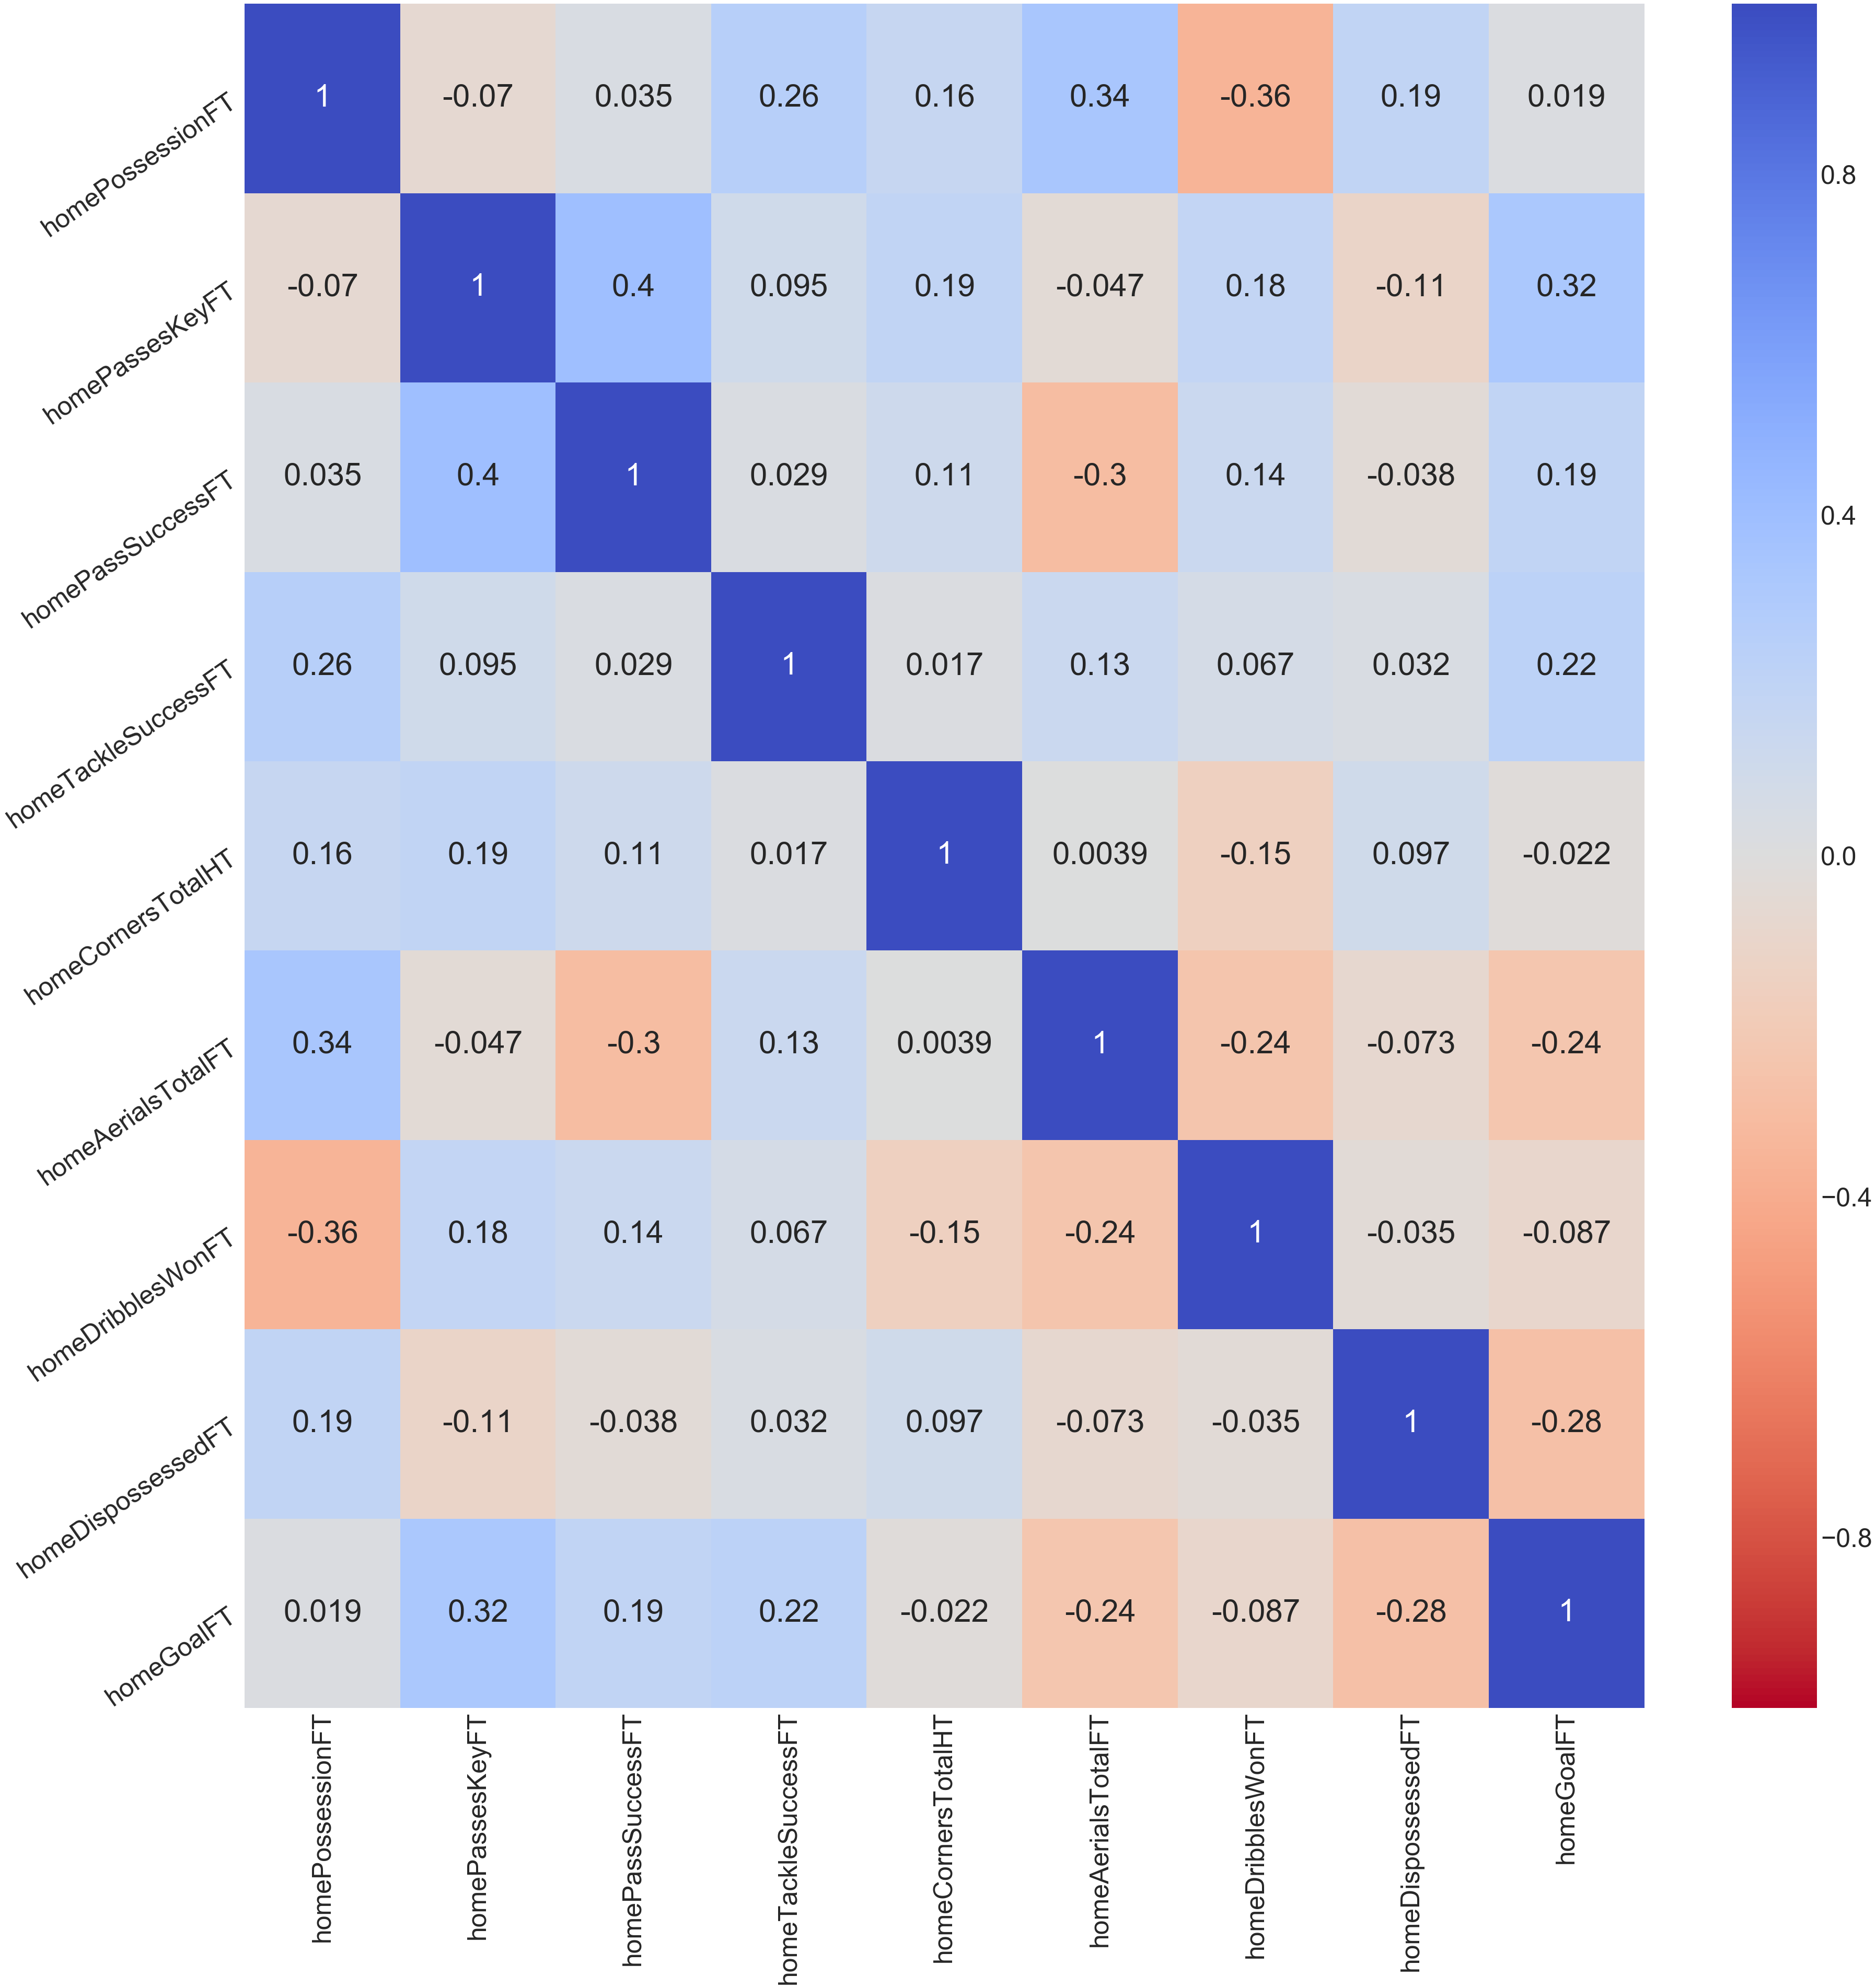

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
#pd.set_option('display.max_columns', None)

# read data from csv
statFull = pd.read_csv("data/FootballEurope.csv", low_memory=False)
print(statFull.head())

# prepare data for plotting graphs
fieldsInterestedHome = ['homePossessionFT', 'homePassesKeyFT', 'homePassSuccessFT', 'homeTackleSuccessFT', 'homeCornersTotalHT', 'homeAerialsTotalFT', 'homeDribblesWonFT', 'homeDispossessedFT', 'homeGoalFT', 'homeManagerName', 'division']

statHome = statFull[fieldsInterestedHome]
statSpecificHomeManager = statHome[statHome['homeManagerName'].str.contains('Simeone')]

#statMeanHome = statHome.groupby(['division']).mean()
#statSpecificHomeManagerMean = statSpecificHomeManager.groupby(['homeManagerName']).mean()

correlations_map=statSpecificHomeManager[fieldsInterestedHome].corr()

#statMean.head()
#statSpecificHomeManagerMean.head()

# columns in the dataset
#print(list(stat))
#print(stat.dtypes.to_string())

# general information of the dataset
#print(stat.describe())

#print(type(stat.iloc[0]['awayTeamLineUp']))
#stat.head(10)['homeTeamLineUp']
#print(stat.iloc[0].to_csv(sys.stdout))

#uniqueDivision = np.unique(stat['division'])
#print(uniqueDivision)

#uniqueHomeManagerName = np.unique(stat['homeManagerName'])
#print(uniqueHomeManagerName)

#feature1 = stat['awayPossessionHT', 'awayPossessionFT', 'awayGoalHT', 'awayGoalFT']
#feature1 = ['awayPossessionHT','awayPassSuccessHT','awayPossessionFT','awayPassSuccessFT','awayGoalHT','awayGoalFT']
#print(feature1)


# plotting
plt.figure(figsize=(60, 60))
sns.set(font_scale=5)
sns.heatmap(correlations_map, annot=True, cbar=True, cmap="coolwarm_r")
plt.xticks(rotation=90, fontsize=50)
plt.yticks(rotation=35, fontsize=50)

#sns.set_color_codes("pastel")
#sns.barplot(data=statMeanHome, label="Total", color="b")

#sns.set_color_codes("muted")
#sns.barplot(data=statSpecificHomeManagerMean, label="Total", color="b")

plt.show()

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sys
#pd.set_option('display.max_columns', None)

# read data from csv
statFull = pd.read_csv("data/FootballEurope.csv", low_memory=False)

fieldsInterestedHome = ['homePossessionFT', 'homePassesKeyFT', 'homePassSuccessFT', 'homeTackleSuccessFT', 'homeCornersTotalFT', 'homeAerialsTotalFT', 'homeDribblesWonFT', 'homeDispossessedFT', 'homeGoalFT', 'homeManagerName', 'division']

statHome = statFull[fieldsInterestedHome]
statHomeMean = statHome.mean()
statHomeMeanDF = pd.DataFrame([statHomeMean])
statHomeMeanDF = statHomeMeanDF.T
statHomeMeanDF['coverage'] = 'All'
statHomeMeanDF.index.name = 'data_type'
statHomeMeanDF.columns = ['value', 'coverage']
print(statHomeMeanDF)

statHomeSpecificManager = statHome[statHome['homeManagerName'].str.contains('Simeone')]
statHomeSpecificManagerMean = statHomeSpecificManager.mean()
statHomeSpecificManagerMean['coverage'] = 'Manager'
statHomeSpecificManagerMeanDF = pd.DataFrame([statHomeSpecificManagerMean])
statHomeSpecificManagerMeanDF = statHomeSpecificManagerMeanDF.T
statHomeSpecificManagerMeanDF['coverage'] = 'All'
statHomeSpecificManagerMeanDF.index.name = 'data_type'
statHomeSpecificManagerMeanDF.columns = ['value', 'coverage']
print(statHomeSpecificManagerMeanDF)

#print(statHomeSpecificManagerMeanDF)

dataFrames = [statHomeMeanDF, statHomeSpecificManagerMeanDF]
df = pd.concat(dataFrames)

#df.head()

# plotting
plt.figure(figsize=(60, 60))
sns.set(font_scale=5)
plt.xticks(rotation=90, fontsize=50)
plt.yticks(rotation=45, fontsize=50)

sns.set_color_codes("pastel")
sns.barplot(x=df.index, y='value', data=df, label="Total", color="b", hue='coverage')

plt.show()

                         value coverage
data_type                              
homePossessionFT     41.307317      All
homePassesKeyFT      10.374493      All
homePassSuccessFT    69.012855      All
homeTackleSuccessFT  71.066465      All
homeCornersTotalFT    5.725805      All
homeAerialsTotalFT   35.085022      All
homeDribblesWonFT     9.479614      All
homeDispossessedFT   11.426318      All
homeGoalFT            1.554180      All
                       value coverage
data_type                            
homePossessionFT     41.2713      All
homePassesKeyFT      10.8526      All
homePassSuccessFT    69.4999      All
homeTackleSuccessFT  75.0776      All
homeCornersTotalFT       6.8      All
homeAerialsTotalFT   32.3158      All
homeDribblesWonFT    9.61053      All
homeDispossessedFT   11.8211      All
homeGoalFT           2.16842      All
coverage             Manager      All


ValueError: Neither the `x` nor `y` variable appears to be numeric.